In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.formula.api as sm
#import statsmodels.discrete.discrete_model as sm

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from datetime import datetime

In [6]:
# Import Datasets
df_mma = pd.read_csv('csv_files/maternal_mortality_all.csv')
df_mms = pd.read_csv('csv_files/maternal_mortality_summary.csv')
df_mrs = pd.read_csv('csv_files/maternity_random_sample.csv')
df_ms = pd.read_csv('csv_files/maternity_summary.csv')
df_ufcs = pd.read_csv('csv_files/us_female_census_summary.csv')


In [11]:
# Rebuild df_ufcs table
df_ufcs_white_nh = df_ufcs[['year','age_cohort','white_nh',]]
df_ufcs_hispanic = df_ufcs[['year','age_cohort','hispanic',]]
df_ufcs_black = df_ufcs[['year','age_cohort','black',]]
df_ufcs_ai_an = df_ufcs[['year','age_cohort','ai_an',]]
df_ufcs_asian_pi = df_ufcs[['year','age_cohort','asian_pi',]]

df_ufcs_white_nh.rename(columns={'white_nh':'female_pop'}, inplace=True)
df_ufcs_hispanic.rename(columns={'hispanic':'female_pop'}, inplace=True)
df_ufcs_black.rename(columns={'black':'female_pop'}, inplace=True)
df_ufcs_ai_an.rename(columns={'ai_an':'female_pop'}, inplace=True)
df_ufcs_asian_pi.rename(columns={'asian_pi':'female_pop'}, inplace=True)

df_ufcs_white_nh['race'] = 'White, Non-Hispanic'
df_ufcs_hispanic['race'] = 'Hispanic'
df_ufcs_black['race'] = 'Black'
df_ufcs_ai_an['race'] = 'American Indian/Alaskan Native'
df_ufcs_asian_pi['race'] = 'Asian/Pacific Islander'

df_ufcs_new = df_ufcs_hispanic.append(df_ufcs_white_nh)
df_ufcs_new = df_ufcs_new.append(df_ufcs_black)
df_ufcs_new = df_ufcs_new.append(df_ufcs_ai_an)
df_ufcs_new = df_ufcs_new.append(df_ufcs_asian_pi)


C:\Users\sjedael\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\sjedael\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sjedael\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [13]:
# Merge rebuilt df_ufcs_new table to df_ms and df_mms

df_master = pd.merge(df_ufcs_new,df_ms,on=['year','race','age_cohort'],how='left')
df_master = pd.merge(df_master,df_mms,on=['year','race','age_cohort'],how='left')

# Scrap temporary dataframes
del df_ufcs_white_nh
del df_ufcs_hispanic
del df_ufcs_black
del df_ufcs_ai_an
del df_ufcs_asian_pi
del df_ufcs_new

df_master.head()

,year,age_cohort,female_pop,race,summary_id_x,hispanic_x,total_births,avg_prenatal_care_start_month,avg_num_prenatal_visits,avg_body_mass_index,...,direct_obstetric_abortive_count,direct_obstetric_nonabortive_count,direct_obstetric_unspecified_count,other_pregnancy_related_count,indirect_obstetric_count,don_eclampsia_preeclampsia_count,don_hemorrhage_count,don_puerperium_embolism_count,don_puerperium_other_count,don_all_other_count
0,2009,10-14,2007233,Hispanic,2009110.0,Hispanic,1543.0,3.9886,8.8000,22.88583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009,15-19,1973970,Hispanic,2009111.0,Hispanic,101543.0,3.5479,9.8919,24.35900,...,0.0,4.0,1.0,5.0,2.0,1.0,0.0,0.0,1.0,2.0
2,2009,20-24,1822286,Hispanic,2009112.0,Hispanic,201658.0,3.2866,10.3452,26.07140,...,2.0,9.0,1.0,9.0,7.0,2.0,1.0,1.0,1.0,4.0
3,2009,25-29,1832483,Hispanic,2009113.0,Hispanic,199500.0,3.0781,10.7595,26.95160,...,2.0,15.0,2.0,19.0,4.0,1.0,2.0,2.0,1.0,9.0
4,2009,30-34,1798201,Hispanic,2009114.0,Hispanic,145233.0,2.9840,10.9913,27.27036,...,0.0,9.0,1.0,24.0,8.0,1.0,0.0,1.0,1.0,6.0


In [14]:
df_master.columns


Index(['year', 'age_cohort', 'female_pop', 'race', 'summary_id_x',
       'hispanic_x', 'total_births', 'avg_prenatal_care_start_month',
       'avg_num_prenatal_visits', 'avg_body_mass_index',
       'prepregnancy_diabetes_count', 'gestational_diabetes_count',
       'prepregnancy_hypertension_count', 'gestational_hypertension_count',
       'hypertension_eclampsia_count', 'prev_preterm_birth_count',
       'prev_cesarean_count', 'total_risk_factors', 'total_prev_cesareans',
       'delivery_vaginal_count', 'delivery_vaginal_prior_cesarean_count',
       'delivery_primary_cesarean_count', 'delivery_repeat_cesarean_count',
       'delivery_vaginal_unknown_prior_count',
       'delivery_cesarean_unknown_prior_count', 'delivery_not_stated_count',
       'total_delivery_vaginal', 'total_delivery_cesarean',
       'maternal_transfusion_count', 'perineal_laceration_count',
       'ruptured_uterus_count', 'unplanned_hysterectomy_count',
       'admit_intensive_care_count', 'total_morbidity_c

In [36]:
# Create Dataframe for scatter plots
df_per10k_births = df_master[['year','age_cohort','race']]

df_per10k_births['prepregnancy_diabetes'] = (df_master.prepregnancy_diabetes_count*10000)/df_master.total_births
df_per10k_births['gestational_diabetes'] = (df_master.gestational_diabetes_count*10000)/df_master.total_births
df_per10k_births['prepregnancy_hypertension'] = (df_master.prepregnancy_hypertension_count*10000)/df_master.total_births
df_per10k_births['gestational_hypertension'] = (df_master.gestational_hypertension_count*10000)/df_master.total_births
df_per10k_births['hypertension_eclampsia'] = (df_master.hypertension_eclampsia_count*10000)/df_master.total_births
df_per10k_births['prev_preterm_birth'] = (df_master.prev_preterm_birth_count*10000)/df_master.total_births
df_per10k_births['total_risk_factors'] = (df_master.total_risk_factors*10000)/df_master.total_births
df_per10k_births['total_delivery_vaginal'] = (df_master.total_delivery_vaginal*10000)/df_master.total_births
df_per10k_births['total_delivery_cesarean'] = (df_master.total_delivery_cesarean*10000)/df_master.total_births
df_per10k_births['maternal_transfusion'] = (df_master.maternal_transfusion_count*10000)/df_master.total_births
df_per10k_births['perineal_laceration'] = (df_master.perineal_laceration_count*10000)/df_master.total_births
df_per10k_births['ruptured_uterus'] = (df_master.ruptured_uterus_count*10000)/df_master.total_births
df_per10k_births['unplanned_hysterectomy'] = (df_master.unplanned_hysterectomy_count*10000)/df_master.total_births
df_per10k_births['admit_intensive_care'] = (df_master.admit_intensive_care_count*10000)/df_master.total_births
df_per10k_births['total_morbidity'] = (df_master.total_morbidity_count*10000)/df_master.total_births
df_per10k_births['total_maternal_deaths'] = (df_master.total_maternal_deaths*10000)/df_master.total_births
df_per10k_births['direct_obstetric_abortive'] = (df_master.direct_obstetric_abortive_count*10000)/df_master.total_births
df_per10k_births['direct_obstetric_nonabortive'] = (df_master.direct_obstetric_nonabortive_count*10000)/df_master.total_births
df_per10k_births['direct_obstetric_unspecified'] = (df_master.direct_obstetric_unspecified_count*10000)/df_master.total_births
df_per10k_births['other_pregnancy_related'] = (df_master.other_pregnancy_related_count*10000)/df_master.total_births
df_per10k_births['indirect_obstetric'] = (df_master.indirect_obstetric_count*10000)/df_master.total_births
df_per10k_births['don_eclampsia_preeclampsia'] = (df_master.don_eclampsia_preeclampsia_count*10000)/df_master.total_births
df_per10k_births['don_hemorrhage'] = (df_master.don_hemorrhage_count*10000)/df_master.total_births
df_per10k_births['don_puerperium_other'] = (df_master.don_puerperium_other_count*10000)/df_master.total_births
df_per10k_births['don_all_other'] = (df_master.don_all_other_count*10000)/df_master.total_births

df_per10k_births.columns

C:\Users\sjedael\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sjedael\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sjedael\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

Index(['year', 'age_cohort', 'race', 'prepregnancy_diabetes',
       'gestational_diabetes', 'prepregnancy_hypertension',
       'gestational_hypertension', 'hypertension_eclampsia',
       'prev_preterm_birth', 'total_risk_factors', 'total_delivery_vaginal',
       'total_delivery_cesarean', 'maternal_transfusion',
       'perineal_laceration', 'ruptured_uterus', 'unplanned_hysterectomy',
       'admit_intensive_care', 'total_morbidity', 'total_maternal_deaths',
       'direct_obstetric_abortive', 'direct_obstetric_nonabortive',
       'direct_obstetric_unspecified', 'other_pregnancy_related',
       'indirect_obstetric', 'don_eclampsia_preeclampsia', 'don_hemorrhage',
       'don_puerperium_other', 'don_all_other'],
      dtype='object')

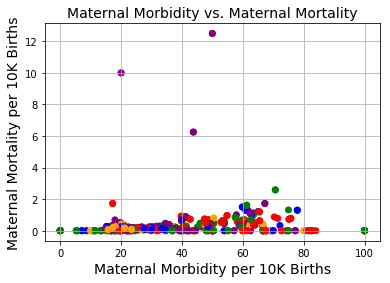

In [34]:
# Check for linearity
color=[]
for race in df_ms.race:
    if race == 'White, Non-Hispanic':
        color.append('blue')
    elif race == 'Hispanic':
        color.append('orange')
    elif race == 'Black':
        color.append('red')
    elif race == 'American Indian/Alaskan Native':
        color.append('purple')
    elif race == 'Asian/Pacific Islander':
        color.append('green')
        
x = df_per10k_births.total_delivery_cesarean
y = df_per10k_births.admit_intensive_care
        
plt.scatter(x, y, color=color)
plt.title('Maternal Morbidity vs. Maternal Mortality', fontsize=14)
plt.xlabel('Maternal Morbidity per 100 Births', fontsize=14)
plt.ylabel('Maternal Mortality per 100 Births', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
df_ufcs.head()

In [ ]:
df_ = df_ufcs[(df_ufcs.year == 2009) & ]

In [41]:
df_group = df_master.groupby([df_master.race,df_master.year])

In [56]:
y = np.around((df_group['total_maternal_deaths'].sum()/df_group['total_births'].sum())*10000,2)

In [85]:
y['Black'].index.tolist()

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [80]:
y['Black'].reset_index().values

array([[2009.  ,    7.23],
       [2010.  ,    5.04],
       [2011.  ,    4.99],
       [2012.  ,    5.6 ],
       [2013.  ,    5.94],
       [2014.  ,    5.6 ],
       [2015.  ,    5.48],
       [2016.  ,    5.64]])

In [70]:
print(df_group['total_births'].sum())

race                            year
American Indian/Alaskan Native  2009      55138.0
                                2010      57832.0
                                2011      65812.0
                                2012      66084.0
                                2013      71422.0
                                2014      81194.0
                                2015      80196.0
                                2016      78680.0
Asian/Pacific Islander          2009     274244.0
                                2010     298514.0
                                2011     336940.0
                                2012     375658.0
                                2013     371962.0
                                2014     429118.0
                                2015     436062.0
                                2016     478660.0
Black                           2009     738826.0
                                2010     853870.0
                                2011     967426.0
             